In [27]:
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù Î™®Îç∏
import statsmodels.formula.api as smf
# ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Ï†ïÍ∑úÏÑ± ÌôïÏù∏: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ÌïôÏäµÏö©/ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Ìòï
from sklearn.linear_model import LinearRegression
# Î≥ÄÏàò ÏÑ†ÌÉùÎ≤ï(ÌõÑÏßÑÏ†úÍ±∞Î≤ï)
from sklearn.feature_selection import RFE
# scale Î≥ÄÌôò -> ÌëúÏ§ÄÌôî ÌöåÍ∑ÄÍ≥ÑÏàò ÏÇ∞Ï∂ú
from sklearn.preprocessing import StandardScaler
# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import r2_score
# ÏÑ†Ìòï Î™®Îç∏
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# ÌèâÍ∞Ä Ìï®Ïàò
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: ÎÇòÎ¨¥ Íµ¨Ï°∞ ÏÉùÏÑ± Î∞è Ï†ÄÏû•
from sklearn.tree import export_graphviz
# graphviz : ÎÇòÎ¨¥ Íµ¨Ï°∞ ÏãúÍ∞ÅÌôî  (.dot ÌôïÏû•Ïûê ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Îì±)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:train, test
from sklearn.model_selection import train_test_split
# ÏòàÏ∏°/ÌöåÍ∑Ä Decision Tree
from sklearn.tree import DecisionTreeRegressor
# ÏòàÏ∏°/ÌöåÍ∑Ä Random Forest
from sklearn.ensemble import RandomForestRegressor
# ÏµúÏ†Å Î™®Îç∏, ÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ
from sklearn.model_selection import GridSearchCV
# ÏòàÏ∏°/ÌöåÍ∑Ä Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (macÏö©)
matplotlib.rc("axes", unicode_minus=False)
matplotlib.rcParams["font.family"] = 'AppleGothic'

# Ïã§ÌñâÍ≤∞Í≥º Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï∂úÎ†• Ï†úÏô∏
import warnings

warnings.filterwarnings('ignore')



In [18]:
df_items = pd.read_csv('./data/on_items.csv', encoding = 'cp949')
df_orders = pd.read_csv('./data/on_orders_.csv', encoding = 'cp949')
df_users = pd.read_csv('./data/on_users.csv', encoding = 'cp949')

In [4]:
df_items.head()

idUser            idOrder             OrderDT           ItemCode  Price  \
0  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M17-S0530-1024  33310   
1  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M21-S0540-1082   3780   
2  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M15-S0140-1311  22520   
3  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M12-S0350-1035  21630   
4  U10001  U10001-O2022-1003  13JAN2022:16:50:14  L4-M12-S0640-1057  11700   

           DeliveryDT  
0  07JAN2022:06:24:00  
1  07JAN2022:06:24:00  
2  07JAN2022:06:24:00  
3  07JAN2022:06:24:00  
4  14JAN2022:06:28:00

In [14]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ItemLargeCode   10054 non-null  object
 1   ItemLargeName   10054 non-null  object
 2   ItemMiddleCode  10054 non-null  object
 3   ItemMiddleName  10054 non-null  object
 4   ItemSmallCode   10054 non-null  object
 5   ItemSmallName   10054 non-null  object
 6   ItemCode        10054 non-null  object
 7   ItemName        10054 non-null  object
 8   PriceYear       10054 non-null  int64 
 9   PriceMin        10054 non-null  int64 
 10  PriceMax        10054 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 864.1+ KB


In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855365 entries, 0 to 855364
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idUser      855365 non-null  object
 1   idOrder     855365 non-null  object
 2   OrderDT     855365 non-null  object
 3   ItemCode    855365 non-null  object
 4   Price       855365 non-null  int64 
 5   DeliveryDT  855365 non-null  object
dtypes: int64(1), object(5)
memory usage: 39.2+ MB


In [16]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idUser       3000 non-null   object
 1   Gender       3000 non-null   object
 2   Age          3000 non-null   int64 
 3   FamilyCount  3000 non-null   int64 
 4   MemberYN     3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


## Ïù¥ÏÉÅÏπò ÌôïÏù∏

<Axes: xlabel='ItemMiddleName', ylabel='PriceMax'>

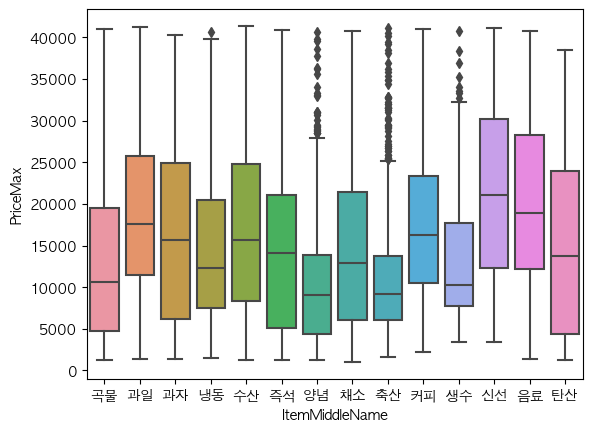

In [24]:
sns.boxplot(x='ItemMiddleName', y='PriceMax', data=df_items)

<Axes: xlabel='ItemMiddleName', ylabel='PriceMin'>

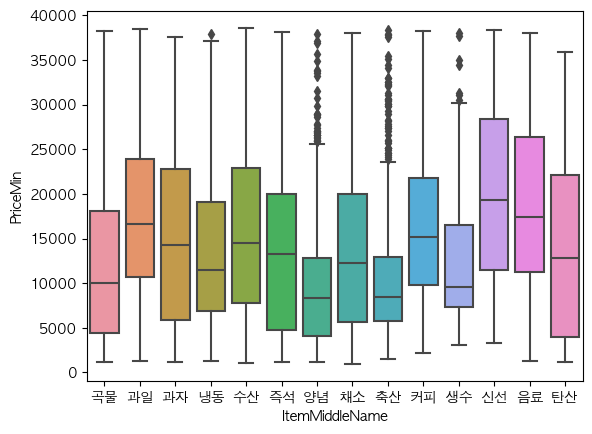

In [ ]:
sns.(x='ItemMiddleName', y='PriceMin', data=df_items)

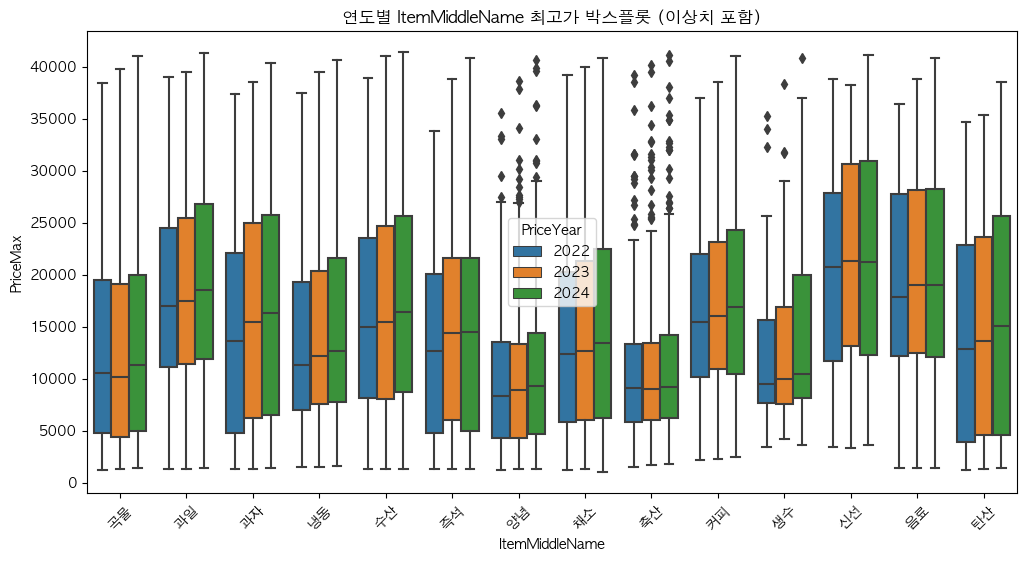

In [27]:
# Ïó∞ÎèÑÎ≥Ñ ItemMiddleName ÏµúÍ≥†Í∞Ä Î∞ïÏä§ÌîåÎ°Ø (Ïù¥ÏÉÅÏπò Ìè¨Ìï®)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_items, x='ItemMiddleName', y='PriceMax', hue='PriceYear')
plt.xticks(rotation=45)
plt.title("Ïó∞ÎèÑÎ≥Ñ ItemMiddleName ÏµúÍ≥†Í∞Ä Î∞ïÏä§ÌîåÎ°Ø (Ïù¥ÏÉÅÏπò Ìè¨Ìï®)")
plt.show()


## Îç∞Ïù¥ÌÑ∞ÏÖã Ï°∞Ïù∏

In [19]:
print("df_orders:", df_orders.columns.tolist())
print("df_items:", df_items.columns.tolist())
print("df_users:", df_users.columns.tolist())


df_orders: ['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT']
df_items: ['ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode', 'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemCode', 'ItemName', 'PriceYear', 'PriceMin', 'PriceMax', 'Ïù¥ÏÉÅÏπò?']
df_users: ['idUser', 'Gender', 'Age', 'FamilyCount', 'MemberYN']


In [ ]:
# import pandas as pd

# # ÌååÏùº Î°úÎìú
# df_items = pd.read_csv('./data/on_items.csv', encoding='cp949')
# df_orders = pd.read_csv('./data/on_orders_.csv', encoding='cp949')
# df_users = pd.read_csv('./data/on_users.csv', encoding='cp949')

# # 1Îã®Í≥Ñ: df_ordersÏôÄ df_itemsÎ•º ItemCode Í∏∞Ï§ÄÏúºÎ°ú outer join
# df_merged = pd.merge(df_orders, df_items, on='ItemCode', how='outer')

# # 2Îã®Í≥Ñ: df_mergedÏôÄ df_usersÎ•º idUser Í∏∞Ï§ÄÏúºÎ°ú outer join
# df_merged = pd.merge(df_merged, df_users, on='idUser', how='outer')

# # Í≤∞Í≥º ÌôïÏù∏
# print(df_merged.shape)
# df_merged.head()


(2302173, 21)


idUser            idOrder             OrderDT           ItemCode    Price  \
0  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M17-S0530-1024  33310.0   
1  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M17-S0530-1024  33310.0   
2  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L4-M17-S0530-1024  33310.0   
3  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M21-S0540-1082   3780.0   
4  U10001  U10001-O2022-1002  06JAN2022:17:08:51  L1-M21-S0540-1082   3780.0   

           DeliveryDT ItemLargeCode ItemLargeName ItemMiddleCode  \
0  07JAN2022:06:24:00            L4          Ïã†ÏÑ†ÏãùÌíà            M17   
1  07JAN2022:06:24:00            L4          Ïã†ÏÑ†ÏãùÌíà            M17   
2  07JAN2022:06:24:00            L4          Ïã†ÏÑ†ÏãùÌíà            M17   
3  07JAN2022:06:24:00            L1          Í∞ÄÍ≥µÏãùÌíà            M21   
4  07JAN2022:06:24:00            L1          Í∞ÄÍ≥µÏãùÌíà            M21   

  ItemMiddleName  ... ItemSmallName             ItemName PriceYear  PriceMin  \
0             ÏàòÏÇ∞  ...            Ï†ÑÎ≥µ  ÏôÑÎèÑ ÌôúÏ†ÑÎ≥µ 1kg Ï§ë 22-25ÎØ∏      2024   37540.0   
1             ÏàòÏÇ∞  ...            Ï†ÑÎ≥µ  ÏôÑÎèÑ ÌôúÏ†ÑÎ≥µ 1kg Ï§ë 22-25ÎØ∏      2023   35660.0   
2             ÏàòÏÇ∞  ...            Ï†ÑÎ≥µ  ÏôÑÎèÑ ÌôúÏ†ÑÎ≥µ 1kg Ï§ë 22-25ÎØ∏      2022   33160.0   
3             Ï¶âÏÑù  ...            Ï¶âÏÑù  ÎèôÏõê ÏñëÎ∞ò Ï∞®ÎèåÎêúÏû•Ï∞åÍ∞ú (460G)      2024    4320.0   
4             Ï¶âÏÑù  ...            Ï¶âÏÑù  ÎèôÏõê ÏñëÎ∞ò Ï∞®ÎèåÎêúÏû•Ï∞åÍ∞ú (460G)      2023    3970.0   

   PriceMax  Ïù¥ÏÉÅÏπò? Gender   Age  FamilyCount  MemberYN  
0     40260   NaN     Ïó¨ÏÑ±  26.0          2.0         Y  
1     39860   NaN     Ïó¨ÏÑ±  26.0          2.0         Y  
2     37070   NaN     Ïó¨ÏÑ±  26.0          2.0         Y  
3      4640   NaN     Ïó¨ÏÑ±  26.0          2.0         Y  
4      4270   NaN     Ïó¨ÏÑ±  26.0          2.0         Y  

[5 rows x 21 columns]

In [20]:
# Ï£ºÎ¨∏ÏùºÏûê ‚Üí ÎÇ†ÏßúÌòï Î≥ÄÌôò
df_orders['OrderDT'] = pd.to_datetime(df_orders['OrderDT'], format='%d%b%Y:%H:%M:%S')

# Ïó∞ÎèÑ Ïª¨Îüº Ï∂îÍ∞Ä
df_orders['Year'] = df_orders['OrderDT'].dt.year


In [21]:
# ÏòàÏãú: Ïó∞ÎèÑ Î™©Î°ù Ï∂îÏ∂ú
years = df_orders['Year'].unique()

# Ïó∞ÎèÑÎ≥Ñ Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
yearly_dfs = {}

for year in years:
    df_orders_y = df_orders[df_orders['Year'] == year]
    
    # step1: Ï£ºÎ¨∏ + ÏÉÅÌíà
    merged_y = pd.merge(df_orders_y, df_items, on='ItemCode', how='left')
    
    # step2: + Í≥†Í∞ù
    merged_y = pd.merge(merged_y, df_users, on='idUser', how='left')
    
    # Ï†ÄÏû•
    yearly_dfs[year] = merged_y


In [22]:
# 2022ÎÖÑÎèÑ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_2022 = yearly_dfs[2022]

# 2023ÎÖÑÎèÑ ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°
avg_2023_price = yearly_dfs[2023]['Price'].mean()


In [23]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614374 entries, 0 to 614373
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idUser          614374 non-null  object        
 1   idOrder         614374 non-null  object        
 2   OrderDT         614374 non-null  datetime64[ns]
 3   ItemCode        614374 non-null  object        
 4   Price           614374 non-null  int64         
 5   DeliveryDT      614374 non-null  object        
 6   Year            614374 non-null  int32         
 7   ItemLargeCode   614374 non-null  object        
 8   ItemLargeName   614374 non-null  object        
 9   ItemMiddleCode  614374 non-null  object        
 10  ItemMiddleName  614374 non-null  object        
 11  ItemSmallCode   614374 non-null  object        
 12  ItemSmallName   614374 non-null  object        
 13  ItemName        614374 non-null  object        
 14  PriceYear       614374 non-null  int

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302173 entries, 0 to 2302172
Data columns (total 21 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idUser          object 
 1   idOrder         object 
 2   OrderDT         object 
 3   ItemCode        object 
 4   Price           float64
 5   DeliveryDT      object 
 6   ItemLargeCode   object 
 7   ItemLargeName   object 
 8   ItemMiddleCode  object 
 9   ItemMiddleName  object 
 10  ItemSmallCode   object 
 11  ItemSmallName   object 
 12  ItemName        object 
 13  PriceYear       int64  
 14  PriceMin        float64
 15  PriceMax        int64  
 16  Ïù¥ÏÉÅÏπò?            object 
 17  Gender          object 
 18  Age             float64
 19  FamilyCount     float64
 20  MemberYN        object 
dtypes: float64(4), int64(2), object(15)
memory usage: 368.8+ MB


In [ ]:
df_merged.isnull().sum()
# Í∞ÄÏûÖÎßå Ìï¥ÎëêÍ≥† Ìïú Î≤àÎèÑ Ï£ºÎ¨∏ Ïïà Ìïú ÌöåÏõê 3Î™Ö?

idUser                  3
idOrder                 3
OrderDT                 3
ItemCode                0
Price                   3
DeliveryDT              3
ItemLargeCode           0
ItemLargeName           0
ItemMiddleCode          0
ItemMiddleName          0
ItemSmallCode           0
ItemSmallName           0
ItemName                0
PriceYear               0
PriceMin               88
PriceMax                0
Ïù¥ÏÉÅÏπò?              2301938
Gender                  3
Age                     3
FamilyCount             3
MemberYN                3
dtype: int64

In [16]:
df_merged = df_merged.drop(['ItemLargeCode', 'ItemMiddleCode','ItemSmallCode', 'Ïù¥ÏÉÅÏπò?'], axis=1)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302173 entries, 0 to 2302172
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   idUser          object 
 1   idOrder         object 
 2   OrderDT         object 
 3   ItemCode        object 
 4   Price           float64
 5   DeliveryDT      object 
 6   ItemLargeName   object 
 7   ItemMiddleName  object 
 8   ItemSmallName   object 
 9   ItemName        object 
 10  PriceYear       int64  
 11  PriceMin        float64
 12  PriceMax        int64  
 13  Gender          object 
 14  Age             float64
 15  FamilyCount     float64
 16  MemberYN        object 
dtypes: float64(4), int64(2), object(11)
memory usage: 298.6+ MB


In [ ]:
df_merged.info()

## ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù

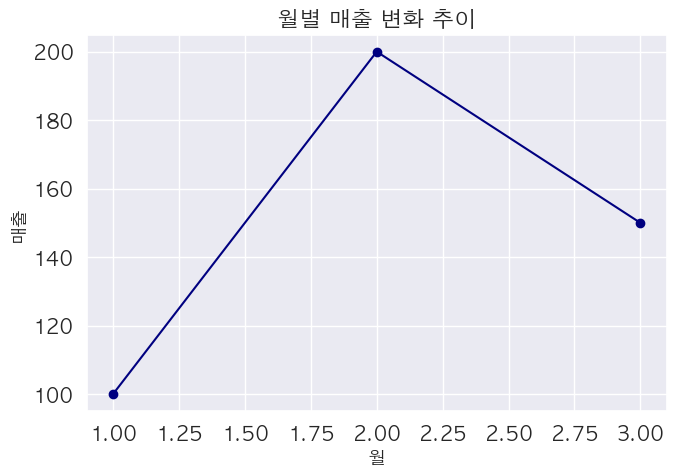

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏàòÎèô ÏÑ§Ï†ï (Ìè∞Ìä∏ Í≤ΩÎ°ú Î∞îÍøîÎèÑ Îê®)
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # MacÏùò Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏
font_prop = fm.FontProperties(fname=font_path)

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏòàÏãú
x = [1, 2, 3]
y = [100, 200, 150]

# ‚úÖ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ (matplotlib Í∏∞Î≥∏ Ïä§ÌÉÄÏùº)
plt.figure(figsize=(7, 5))
plt.plot(x, y, marker='o', color='navy')

# ‚úÖ ÌïúÍ∏Ä ÌÖçÏä§Ìä∏ Ï†ÑÎ∂ÄÏóê fontproperties Ï†ÅÏö©
plt.title("ÏõîÎ≥Ñ Îß§Ï∂ú Î≥ÄÌôî Ï∂îÏù¥", fontproperties=font_prop, fontsize=16)
plt.xlabel("Ïõî", fontproperties=font_prop, fontsize=13)
plt.ylabel("Îß§Ï∂ú", fontproperties=font_prop, fontsize=13)

# ‚úÖ ÎààÍ∏à(label)ÏóêÎèÑ ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö©
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./data/df_clean.csv')

df['OrderDT'] = pd.to_datetime(df['OrderDT'])


In [18]:
import pandas as pd

# Ïó¥ Í∞úÏàò Î¨¥Ï†úÌïú ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)

# ÌÑ∞ÎØ∏ÎÑê ÎÑàÎπÑÏóê ÎßûÍ≤å ÏûêÎèô Ï°∞Ï†ï
pd.set_option('display.width', None)

# (ÏÑ†ÌÉù) Í∏¥ Î¨∏ÏûêÏó¥ ÏûêÎ•¥ÏßÄ ÏïäÍ∏∞
pd.set_option('display.max_colwidth', None)

# (Ï∂îÍ∞Ä) info Ï∂úÎ†• ÎåÄÏã† columns Î¶¨Ïä§Ìä∏Î°ú ÌôïÏù∏
print(df.columns.tolist())


['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN', 'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour', 'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName', 'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear', 'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month', 'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration', 'Deli_Hours', 'IsMorningDelivery']


In [22]:
# ÏßÅÏ†ë Î™®Îì† Ïó¥ Ï†ïÎ≥¥ Ï∂úÎ†•ÌïòÍ∏∞
for col in df.columns:
    print(f"{col:25} | {df[col].notnull().sum():>7} non-null | {df[col].dtype}")


idUser                    |  856727 non-null | object
Gender                    |  856727 non-null | object
Age                       |  856727 non-null | int64
AgeGroup                  |  856727 non-null | object
FamilyCount               |  856727 non-null | int64
MemberYN                  |  856727 non-null | object
idOrder                   |  856727 non-null | object
OrderDT                   |  856727 non-null | datetime64[ns]
OrderMonth                |  856727 non-null | int64
OrderDay                  |  856727 non-null | int64
OrderHour                 |  856727 non-null | int64
OrderMinute               |  856727 non-null | int64
OrderSecond               |  856727 non-null | int64
ItemCode                  |  856727 non-null | object
ItemLargeName             |  856727 non-null | object
ItemMiddleName            |  856727 non-null | object
ItemSmallName             |  856727 non-null | object
ItemName                  |  856727 non-null | object
Price                     |

In [23]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')

In [21]:
df.describe(include='all')

idUser  Gender            Age AgeGroup    FamilyCount MemberYN  \
count   856727  856727  856727.000000   856727  856727.000000   856727   
unique    3000       2            NaN        5            NaN        2   
top     U10642      Ïó¨ÏÑ±            NaN      30ÎåÄ            NaN        Y   
freq       479  517979            NaN   363387            NaN   614152   
mean       NaN     NaN      36.799389      NaN       1.622516      NaN   
min        NaN     NaN      21.000000      NaN       0.000000      NaN   
25%        NaN     NaN      29.000000      NaN       1.000000      NaN   
50%        NaN     NaN      35.000000      NaN       2.000000      NaN   
75%        NaN     NaN      43.000000      NaN       2.000000      NaN   
max        NaN     NaN      69.000000      NaN       3.000000      NaN   
std        NaN     NaN      10.937187      NaN       0.974573      NaN   

                  idOrder                        OrderDT     OrderMonth  \
count              856727                         856727  856727.000000   
unique             171431                            NaN            NaN   
top     U10642-O2024-1006                            NaN            NaN   
freq                   20                            NaN            NaN   
mean                  NaN  2023-09-04 20:48:01.145616128       6.507997   
min                   NaN            2022-01-02 19:43:00       1.000000   
25%                   NaN            2023-01-01 13:41:00       4.000000   
50%                   NaN            2023-10-11 18:54:00       7.000000   
75%                   NaN            2024-05-30 17:36:00      10.000000   
max                   NaN            2024-12-29 23:57:00      12.000000   
std                   NaN                            NaN       3.435720   

             OrderDay      OrderHour    OrderMinute    OrderSecond  \
count   856727.000000  856727.000000  856727.000000  856727.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        15.780875      15.662171      29.443211      29.506264   
min          1.000000       0.000000       0.000000       0.000000   
25%          8.000000      12.000000      14.000000      15.000000   
50%         16.000000      17.000000      29.000000      30.000000   
75%         23.000000      20.000000      44.000000      44.000000   
max         31.000000      23.000000      59.000000      59.000000   
std          8.781174       5.060049      17.310887      17.293832   

                 ItemCode ItemLargeName ItemMiddleName ItemSmallName  \
count              856727        856727         856727        856727   
unique               3973             4             14            59   
top     L1-M11-S0220-1030          Í∞ÄÍ≥µÏãùÌíà             Í≥ºÏùº            ÎÉâÎèô   
freq                 1097        428807         179049         64469   
mean                  NaN           NaN            NaN           NaN   
min                   NaN           NaN            NaN           NaN   
25%                   NaN           NaN            NaN           NaN   
50%                   NaN           NaN            NaN           NaN   
75%                   NaN           NaN            NaN           NaN   
max                   NaN           NaN            NaN           NaN   
std                   NaN           NaN            NaN           NaN   

                                                 ItemName          Price  \
count                                              856727  856727.000000   
unique                                               3988            NaN   
top     ÎÜçÏã¨ Ïã†ÎùºÎ©¥ 120g 10Í∞ú + ÏñºÌÅ∞Ìïú ÎÑàÍµ¨Î¶¨ 120g 5Í∞ú + Ïò¨Î¶¨Î∏å ÏßúÌååÍ≤åÌã∞ 140g            NaN   
freq                                                 1097            NaN   
mean                                                  NaN   15416.6691

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856727 entries, 0 to 856726
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idUser             856727 non-null  object        
 1   Gender             856727 non-null  object        
 2   Age                856727 non-null  int64         
 3   AgeGroup           856727 non-null  object        
 4   FamilyCount        856727 non-null  int64         
 5   MemberYN           856727 non-null  object        
 6   idOrder            856727 non-null  object        
 7   OrderDT            856727 non-null  datetime64[ns]
 8   OrderMonth         856727 non-null  int64         
 9   OrderDay           856727 non-null  int64         
 10  OrderHour          856727 non-null  int64         
 11  OrderMinute        856727 non-null  int64         
 12  OrderSecond        856727 non-null  int64         
 13  ItemCode           856727 non-null  object  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


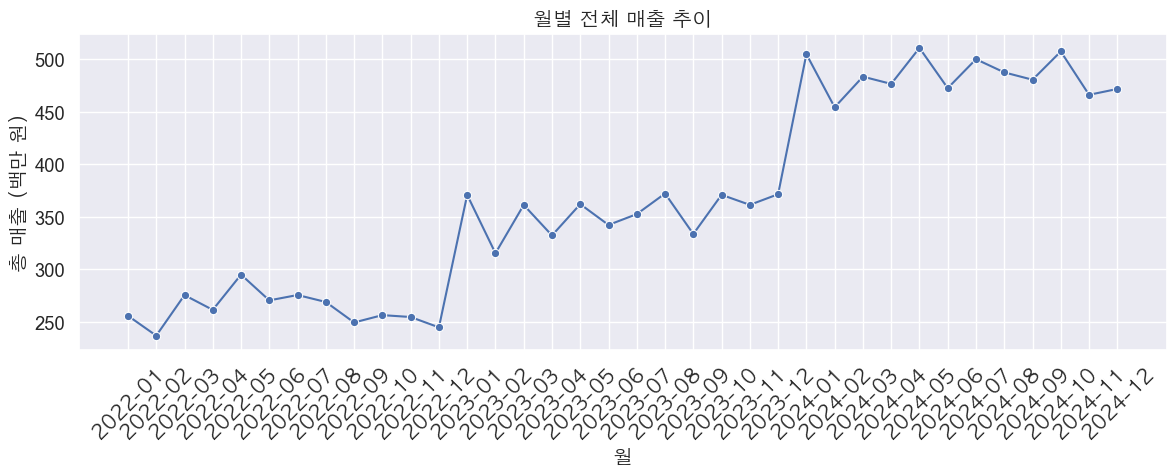

NameError: name 'weekly_sales' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Mac Í∏∞Ï§Ä)
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# ÎÇ†Ïßú Í∏∞Î∞ò ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
df['year_month'] = df['OrderDT'].dt.to_period('M').astype(str)
df['year_week'] = df['OrderDT'].dt.strftime('%Y-%U')
df['weekday'] = df['OrderDT'].dt.day_name()

# Ïó∞Î†πÎåÄ Í∑∏Î£π ÏÉùÏÑ±
df['age_group'] = pd.cut(df['Age'],
                         bins=[10, 20, 30, 40, 50, 60, 100],
                         labels=['10ÎåÄ', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ+'])

# -------------------------------
# ÏõîÎ≥Ñ Ï†ÑÏ≤¥ Îß§Ï∂ú (Î∞±Îßå Ïõê Îã®ÏúÑ Î≥ÄÌôò)
monthly_sales = df.groupby('year_month')['Price'].sum().reset_index()
monthly_sales['Price_million'] = monthly_sales['Price'] / 1e6


plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='year_month', y='Price_million', marker='o')
plt.title('ÏõîÎ≥Ñ Ï†ÑÏ≤¥ Îß§Ï∂ú Ï∂îÏù¥', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Î∞±Îßå Ïõê)', fontproperties=font_prop)
plt.xlabel('Ïõî', fontproperties=font_prop)
plt.tight_layout()
plt.show()

# -------------------------------
# Ï£ºÏ∞®Î≥Ñ Ï†ÑÏ≤¥ Îß§Ï∂ú (Î∞±Îßå Ïõê Îã®ÏúÑ Î≥ÄÌôò)
# xÏ∂ï Î†àÏù¥Î∏î Ï§ÑÏù¥Í∏∞: 4Ï£º Îã®ÏúÑ ÌëúÏãú
xticks = weekly_sales['year_week'].tolist()[::4]  # 4Ï£º Í∞ÑÍ≤©ÏúºÎ°ú Ï∂îÏ∂ú
# Ï£ºÏ∞®Î≥Ñ ÎåÄÌëú ÎÇ†Ïßú Ïª¨Îüº ÏÉùÏÑ±
weekly_sales['week_start'] = pd.to_datetime(weekly_sales['year_week'] + '-1', format='%Y-%U-%w')

# 4Ï£º Í∞ÑÍ≤©ÏúºÎ°úÎßå ÎààÍ∏à ÌëúÏãú
xticks = weekly_sales['week_start'][::4]
xtick_labels = weekly_sales['week_start'][::4].dt.strftime('%m/%d')  # ÎòêÎäî '%Y-%m-%d'ÎèÑ Í∞ÄÎä•

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_sales, x='week_start', y='Price_million', marker='o')

plt.title('Ï£ºÏ∞®Î≥Ñ Ï†ÑÏ≤¥ Îß§Ï∂ú Ï∂îÏù¥', fontproperties=font_prop)
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45, fontproperties=font_prop)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Î∞±Îßå Ïõê)', fontproperties=font_prop)
plt.xlabel('Ï£º ÏãúÏûëÏùº (Ïõî/Ïùº)', fontproperties=font_prop)
plt.tight_layout()
plt.show()



# -------------------------------
# Ïó∞Î†πÎåÄÎ≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú (Î∞±Îßå Ïõê Îã®ÏúÑ Î≥ÄÌôò)
age_monthly_sales = df.groupby(['year_month', 'age_group'])['Price'].sum().reset_index()
age_monthly_sales['Price_million'] = age_monthly_sales['Price'] / 1e6

plt.figure(figsize=(14, 6))
sns.lineplot(data=age_monthly_sales, x='year_month', y='Price_million', hue='age_group', marker='o')
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Î∞±Îßå Ïõê)', fontproperties=font_prop)
plt.xlabel('Ïõî', fontproperties=font_prop)
plt.legend(title='Ïó∞Î†πÎåÄ', prop=font_prop)
plt.tight_layout()
plt.show()


## Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îß§Ï∂úÎ∂ÑÏÑù(Ïã†ÏÑ†ÏãùÌíà/Í∞ÄÍ≥µÏãùÌíà)

In [36]:
# Ïõî + Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
category_monthly_sales = df.groupby(['year_month', 'ItemLargeName'])['Price'].sum().reset_index()

# Î∞±Îßå Ïõê Îã®ÏúÑÎ°ú Î≥ÄÌôò
category_monthly_sales['Price_million'] = category_monthly_sales['Price'] / 1e6


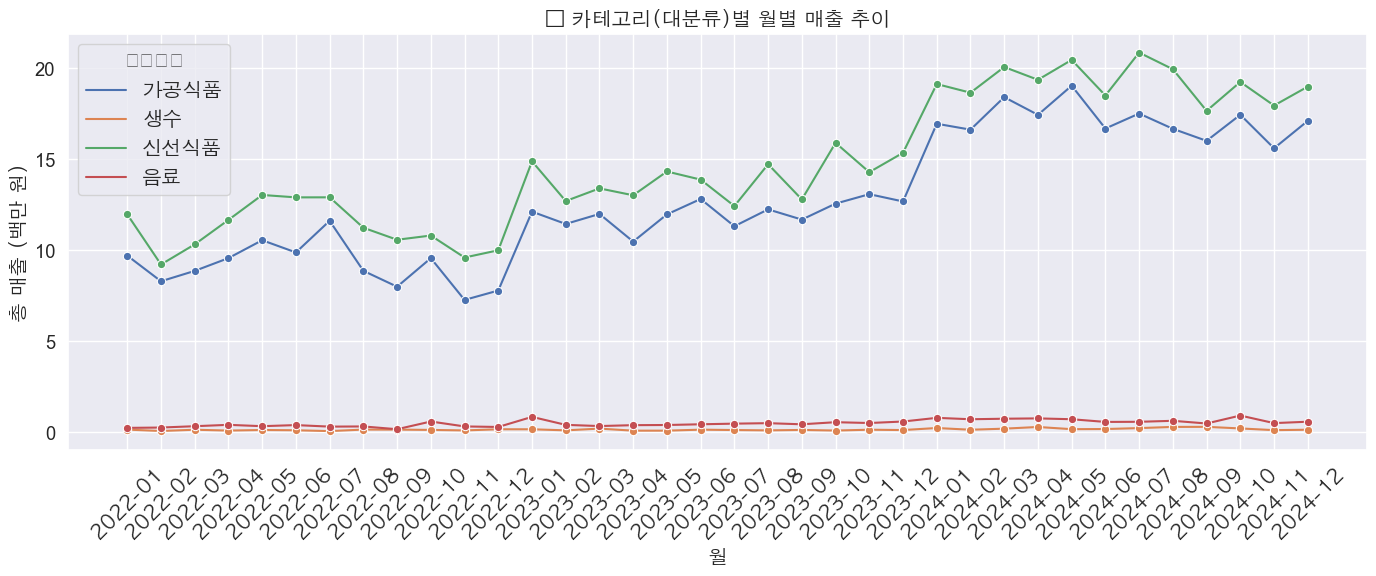

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=category_monthly_sales, x='year_month', y='Price_million',
             hue='ItemLargeName', marker='o')

plt.title('üì¶ Ïπ¥ÌÖåÍ≥†Î¶¨(ÎåÄÎ∂ÑÎ•ò)Î≥Ñ ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Î∞±Îßå Ïõê)', fontproperties=font_prop)
plt.xlabel('Ïõî', fontproperties=font_prop)
plt.legend(title='Ïπ¥ÌÖåÍ≥†Î¶¨', prop=font_prop)
plt.tight_layout()
plt.show()


In [38]:
# ÌäπÏ†ï ÏõîÏóê Ïñ¥Îñ§ Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä Îß§Ï∂úÏù¥ Ï§ÑÏóàÎäîÏßÄ
category_monthly_sales[category_monthly_sales['year_month'] == '2023-12']\
    .sort_values(by='Price_million', ascending=False)


year_month ItemLargeName     Price  Price_million
94    2023-12          Ïã†ÏÑ†ÏãùÌíà  15342940       15.34294
92    2023-12          Í∞ÄÍ≥µÏãùÌíà  12665870       12.66587
95    2023-12            ÏùåÎ£å    565350        0.56535
93    2023-12            ÏÉùÏàò     96570        0.09657

## ÏÜåÎπÑ Ìä∏Î†åÎìú ÎπÑÍµê: Ï†ÑÏ≤¥ Í≥†Í∞ù Í∏∞Ï§Ä Ï§ëÎ∂ÑÎ•ò ÏÉÅÏúÑ 5Í∞ú ÌíàÎ™©Ïùò ÏõîÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥

In [39]:
# Ïõî + Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú ÏßëÍ≥Ñ
middle_monthly_sales = df.groupby(['year_month', 'ItemMiddleName'])['Price'].sum().reset_index()
middle_monthly_sales['Price_million'] = middle_monthly_sales['Price'] / 1e6


In [40]:
# Ï†ÑÏ≤¥ Ï§ëÎ∂ÑÎ•òÎ≥Ñ Ï¥ù Îß§Ï∂ú Í≥ÑÏÇ∞ ‚Üí ÏÉÅÏúÑ 5Í∞ú ÏÑ†Ï†ï
top_middle = df.groupby('ItemMiddleName')['Price'].sum().nlargest(5).index.tolist()

# ÏÉÅÏúÑ 5Í∞ú Ï§ëÎ∂ÑÎ•òÎßå ÌïÑÌÑ∞ÎßÅ
middle_monthly_top5 = middle_monthly_sales[middle_monthly_sales['ItemMiddleName'].isin(top_middle)]


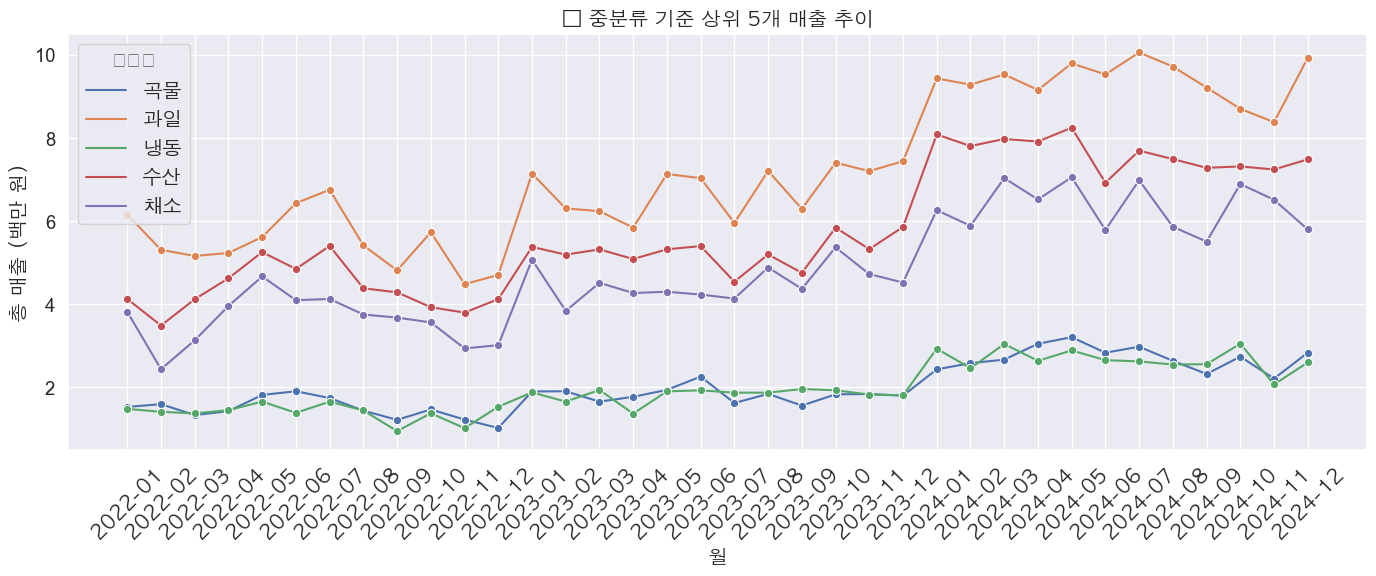

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=middle_monthly_top5, x='year_month', y='Price_million',
             hue='ItemMiddleName', marker='o')

plt.title('üç± Ï§ëÎ∂ÑÎ•ò Í∏∞Ï§Ä ÏÉÅÏúÑ 5Í∞ú Îß§Ï∂ú Ï∂îÏù¥', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Î∞±Îßå Ïõê)', fontproperties=font_prop)
plt.xlabel('Ïõî', fontproperties=font_prop)
plt.legend(title='Ï§ëÎ∂ÑÎ•ò', prop=font_prop)
plt.tight_layout()
plt.show()


### Ï†ÑÏ≤¥ Í≥†Í∞ù Í∏∞Ï§Ä Ï§ëÎ∂ÑÎ•ò Îß§Ï∂ú Ï∂îÏù¥ 

1ÏúÑ: Í≥ºÏùº
ÏïïÎèÑÏ†Å 1ÏúÑ Ïú†ÏßÄ, Î™ÖÏ†à(1Ïõî, 2Ïõî, 12Ïõî)Ïóê Í∏âÎì±ÌïòÎäî Î™ÖÌôïÌïú ÏãúÏ¶åÏÑ±

4060Îøê ÏïÑÎãàÎùº Ï†ÑÏ≤¥ Í≥†Í∞ùÎèÑ Í≥ºÏùºÏóê ÌÅ∞ ÏÜåÎπÑ ÏßëÏ§ë

2024ÎÖÑ 1Ïõî Îß§Ï∂ú 10Ïñµ Ïõê ÎèåÌåå ‚Üí ÏÇ¨Ï†Ñ ÏòàÏïΩ, ÏÑ†Î¨ºÏÑ∏Ìä∏ ÌÉÄÍ≤ü Ïú†Î†•

2ÏúÑ: ÏàòÏÇ∞
Ïã†ÏÑ† Ïπ¥ÌÖåÍ≥†Î¶¨Î°úÏç® Íæ∏Ï§ÄÌûà Ïù∏Í∏∞

Í≤®Ïö∏Ïóê ÏÜåÌè≠ ÏÉÅÏäπ ‚Üí Íµ≠Î¨ºÏöîÎ¶¨ ÏãúÏ¶å ÏòÅÌñ• Í∞ÄÎä•

4060Í≥º Ìä∏Î†åÎìú Ïú†ÏÇ¨

3ÏúÑ: Ï±ÑÏÜå
4060Î≥¥Îã§ Ï†ÑÏ≤¥ Í≥†Í∞ùÏóêÏÑú Îß§Ï∂úÏù¥ Îçî ÎÜíÏùå

Ï†äÏùÄÏ∏µÍπåÏßÄ Ìè¨Ìï®ÎêòÏñ¥ ÏÉêÎü¨Îìú, Í±¥Í∞ïÏãù Ìä∏Î†åÎìú Î∞òÏòÅ

2023~2024ÎÖÑ Ï±ÑÏÜå Îß§Ï∂ú ÏïàÏ†ïÏ†Å ÏÉÅÏäπ ‚Üí Ìó¨ÏãúÌë∏Îìú Ï†ÑÎûµ Í∞ïÌôî Í∞ÄÎä•

4ÏúÑ: ÎÉâÎèô
4060ÏóêÏÑúÎäî ÎÇÆÏùÄ ÏàúÏúÑÏòÄÎäîÎç∞, Ï†ÑÏ≤¥ÏóêÏÑúÎäî Í≥ºÏùº/ÏàòÏÇ∞/Ï±ÑÏÜå Îã§Ïùå ÏàòÏ§Ä

Ï†äÏùÄÏ∏µÏùò HMR(Í∞ÄÏ†ïÍ∞ÑÌé∏Ïãù) ÏàòÏöî Î∞òÏòÅ?

2024ÎÖÑ Ï¥à ÏÉÅÏäπÏÑ∏ ‚Üí Ï∫†ÌéòÏù∏ ÎòêÎäî Ï†úÌíàÍµ∞ ÌôïÏû• Ìö®Í≥º

5ÏúÑ: Í≥°Î¨º
Îã§Î•∏ ÌíàÎ™©Ïóê ÎπÑÌï¥ Í∞ÄÏû• ÏôÑÎßåÌïú ÏÉÅÏäπ Í≥°ÏÑ†

Íæ∏Ï§ÄÌûà ÏÇ¨Îäî ÏãùÏû¨Î£åÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÌîÑÎ°úÎ™®ÏÖò Î∞òÏùëÏùÄ ÏïΩÌïòÏßÄÎßå LTVÍ∞Ä ÎÜíÏùÄ ÌíàÎ™©



ÌôúÏö© ÏïÑÏù¥ÎîîÏñ¥
ÎÉâÎèô ÏÉÅÌíàÍµ∞ÏùÑ 4060 ÌÉÄÍ≤üÏúºÎ°ú ÌôïÏû•Ìï¥Î≥º Ïàò ÏûàÏùå

‚Äú4060ÏùÑ ÏúÑÌïú Í∞ÑÌé∏Ïãù‚Äù, ‚ÄúÍ±¥Í∞ïÌïú ÎÉâÎèôÎ∞•ÏÉÅ‚Äù Ï∫†ÌéòÏù∏ Îì±

Í≥ºÏùº/ÏàòÏÇ∞ÏùÄ Î™ÖÏ†à ÏãúÏ†ê ÏßëÏ§ë Í¥ëÍ≥† ÌïÑÏöî

ÌäπÌûà 12Ïõî~2Ïõî: ÏÇ¨Ï†ÑÏòàÏïΩ, ÏÑ†Î¨º Ìå®ÌÇ§ÏßÄ, Ïû¨Íµ¨Îß§ Î¶¨ÎßàÏù∏Îìú Ï†ÑÎûµ

Í≥°Î¨º¬∑Ï±ÑÏÜåÎäî LTV Í∏∞Î∞ò Ï†ïÍ∏∞Î∞∞ÏÜ° Ïú†ÎèÑ

ÏûêÎèô Í≤∞Ï†ú, Îã®Í≥® Ïú†ÏπòÏö© ÌîÑÎ°úÎ™®ÏÖò Ï†ÅÌï©

## 4060 Í≥†Í∞ù ÎåÄÏÉÅ Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú Î∂ÑÏÑù

In [42]:
# 4060 Í≥†Í∞ùÍµ∞ ÌïÑÌÑ∞
df_4060 = df[df['age_group'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ+'])]


In [43]:
middle_4060_sales = df_4060.groupby(['year_month', 'ItemMiddleName'])['Price'].sum().reset_index()
middle_4060_sales['Price_million'] = middle_4060_sales['Price'] / 1e6

# ÏÉÅÏúÑ Ï§ëÎ∂ÑÎ•ò 5Í∞ú Ï∂îÏ∂ú
top_middle_4060 = df_4060.groupby('ItemMiddleName')['Price'].sum().nlargest(5).index.tolist()
middle_4060_top5 = middle_4060_sales[middle_4060_sales['ItemMiddleName'].isin(top_middle_4060)]


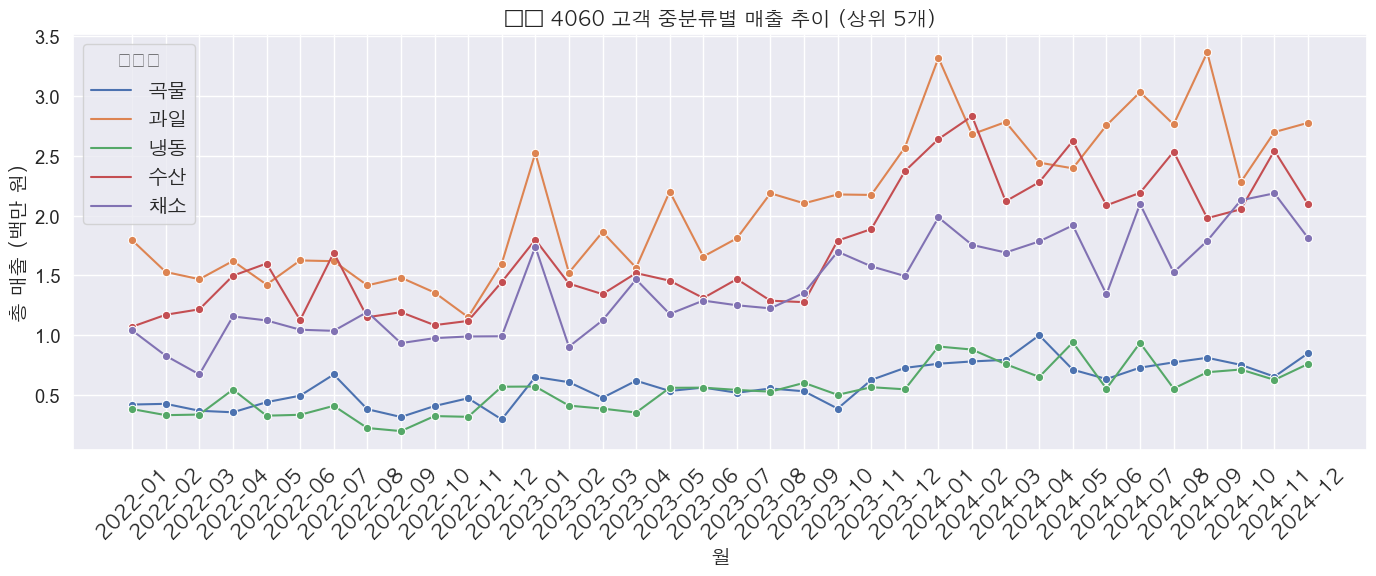

In [44]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=middle_4060_top5, x='year_month', y='Price_million',
             hue='ItemMiddleName', marker='o')

plt.title('üëµüßì 4060 Í≥†Í∞ù Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú Ï∂îÏù¥ (ÏÉÅÏúÑ 5Í∞ú)', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.ylabel('Ï¥ù Îß§Ï∂ú (Î∞±Îßå Ïõê)', fontproperties=font_prop)
plt.xlabel('Ïõî', fontproperties=font_prop)
plt.legend(title='Ï§ëÎ∂ÑÎ•ò', prop=font_prop)
plt.tight_layout()
plt.show()


### 4060 Í≥†Í∞ùÏù¥ ÏÑ†Ìò∏ÌïòÎäî Ï§ëÎ∂ÑÎ•ò

1ÏúÑ: Í≥ºÏùº
ÏïïÎèÑÏ†ÅÏù∏ 1ÏúÑ, Îã§Î•∏ ÌíàÎ™©Í≥º Í≤©Ï∞® ÌÅº

2023ÎÖÑ 12Ïõî, 2024ÎÖÑ 1ÏõîÏóê Í∏âÎì±: ÏÑ§/Î™ÖÏ†à ÏòÅÌñ• Í∞ÄÎä•ÏÑ±

ÏãúÏ¶åÏÑ± Í∞ïÌï® ‚Üí Ï†úÏ≤†, Î™ÖÏ†à Í≥ºÏùºÏÑ∏Ìä∏ Îì±Ïóê ÎØºÍ∞êÌïú Î∞òÏùë

2ÏúÑ: ÏàòÏÇ∞
Ïó∞Ï§ë ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÎÜíÍ≥†, Í≤®Ïö∏Ï≤† ÏÉÅÏäπÏÑ∏Í∞Ä ÎöúÎ†∑

12~2Ïõî Í∞ïÏÑ∏: ÍπÄÏû•, Íµ≠Î¨ºÏöîÎ¶¨ Îì± Í≤®Ïö∏Ï≤† ÏÜåÎπÑ ÏòÅÌñ•

Ïã†ÏÑ†ÎèÑ, Î∞∞ÏÜ° Ïã†Î¢∞Í∞êÏù¥ Ï§ëÏöî ‚Üí Ïã†Î¢∞ Í∏∞Î∞ò Î∏åÎûúÎìú Ï†ÑÎûµ ÌïÑÏöî

3ÏúÑ: Ï±ÑÏÜå
Ï†êÏßÑÏ†ÅÏúºÎ°ú Ïö∞ÏÉÅÌñ•: Íæ∏Ï§ÄÌûà ÎäòÏñ¥ÎÇòÎäî Íµ¨Îß§

1Ïù∏Í∞ÄÍµ¨Î≥¥Îã§Îäî Í∞ÄÏ†ïÏãù Í∏∞Î∞ò 2Ïù∏ Ïù¥ÏÉÅ Íµ¨ÏÑ±Ïóê Ï†ÅÌï©

Ìó¨ÏãúÌë∏Îìú Ìä∏Î†åÎìúÏóê Î∞òÏùë Í∞ÄÎä•ÏÑ±ÎèÑ ÏûàÏùå

4ÏúÑ: ÎÉâÎèô
Îã§Î•∏ ÌíàÎ™©Ïóê ÎπÑÌï¥ Îß§Ï∂úÏùÄ ÎÇÆÏßÄÎßå, 2024ÎÖÑÎ∂ÄÌÑ∞ ÏÜåÌè≠ Ï¶ùÍ∞Ä Ï∂îÏÑ∏

Ìé∏ÏùòÏÑ±, ÏãùÏû¨Î£å ÎåÄÏ≤¥ Ïö©ÎèÑÎ°ú ÏÑ†Ìò∏

4060ÎèÑ Í∞ÑÌé∏Ïãù ÏÜåÎπÑÏóê ÏÑúÏÑúÌûà ÏùµÏàôÌï¥ÏßÄÍ≥† ÏûàÏùå

5ÏúÑ: Í≥°Î¨º
4060Ïùò Í∏∞Î≥∏ ÏãùÏû¨Î£å: ÏåÄ, Ïû°Í≥°, ÏãúÎ¶¨Ïñº Îì±

Îß§Ï∂úÏùÄ ÎÇÆÏßÄÎßå Íæ∏Ï§ÄÌï®Ïù¥ Í∞ïÏ†ê

Ï†ïÍ∏∞Î∞∞ÏÜ°/Î¨∂ÏùåÎ∞∞ÏÜ° Ï†ÑÎûµÍ≥º Ïûò Ïñ¥Ïö∏Î¶º

## Ïó∞Î†πÎåÄ √ó Ï§ëÎ∂ÑÎ•ò Îß§Ï∂ú ÌûàÌä∏Îßµ Î∂ÑÏÑù

In [45]:
# Ïó∞Î†πÎåÄ √ó Ï§ëÎ∂ÑÎ•òÎ≥Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í≥ÑÏÇ∞
age_middle_sales = df.groupby(['age_group', 'ItemMiddleName'])['Price'].sum().reset_index()

# Î∞±Îßå Ïõê Îã®ÏúÑÎ°ú Î≥ÄÌôò
age_middle_sales['Price_million'] = age_middle_sales['Price'] / 1e6


In [46]:
# Ïó∞Î†πÎåÄ: index, Ï§ëÎ∂ÑÎ•ò: columns, Í∞í: Îß§Ï∂ú
pivot_table = age_middle_sales.pivot(index='age_group', columns='ItemMiddleName', values='Price_million')

# Í≤∞Ï∏°Í∞í 0ÏúºÎ°ú ÎåÄÏ≤¥ (Íµ¨Îß§ ÏóÜÏóàÎçò Í≤ΩÏö∞)
pivot_table = pivot_table.fillna(0)


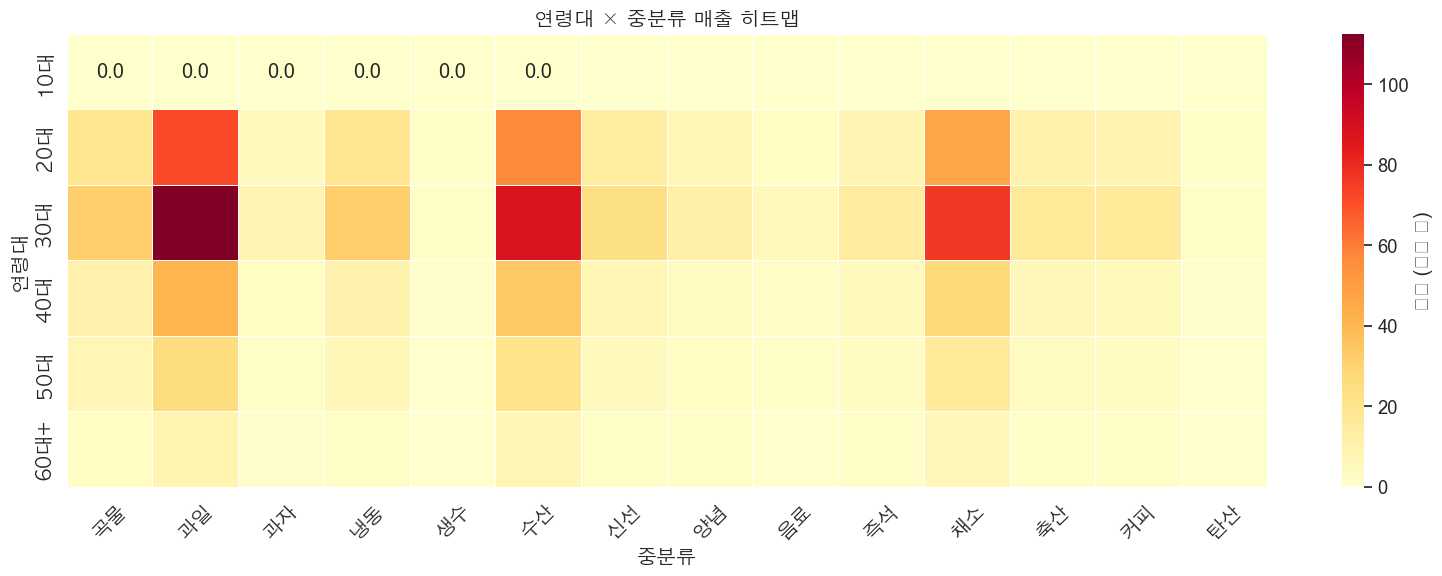

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': 'Îß§Ï∂ú (Î∞±Îßå Ïõê)'})

plt.title("Ïó∞Î†πÎåÄ √ó Ï§ëÎ∂ÑÎ•ò Îß§Ï∂ú ÌûàÌä∏Îßµ", fontproperties=font_prop)
plt.xlabel("Ï§ëÎ∂ÑÎ•ò", fontproperties=font_prop)
plt.ylabel("Ïó∞Î†πÎåÄ", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


## 4060 vs 2030 Ïó∞Î†πÎåÄÎ≥Ñ Í∞ùÎã®Í∞Ä(AOV) ÎπÑÍµê

In [48]:
# Ï£ºÎ¨∏ Îã®ÏúÑÎ°ú Ï¥ù Í∏àÏï°, Í≥†Í∞ù Ï†ïÎ≥¥ Ï∂îÏ∂ú
order_level = df.groupby('idOrder').agg(
    total_price=('Price', 'sum'),
    idUser=('idUser', 'first'),
    age=('Age', 'first'),
    age_group=('age_group', 'first')
).reset_index()


In [49]:
# 2030 Í∑∏Î£π
young = order_level[order_level['age_group'].isin(['20ÎåÄ', '30ÎåÄ'])]
# 4060 Í∑∏Î£π
senior = order_level[order_level['age_group'].isin(['40ÎåÄ', '50ÎåÄ', '60ÎåÄ+'])]


In [50]:
print("üßë‚Äçüéì 2030 Í∞ùÎã®Í∞Ä (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°):", round(young['total_price'].mean(), 2), "Ïõê")
print("üßì 4060 Í∞ùÎã®Í∞Ä (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°):", round(senior['total_price'].mean(), 2), "Ïõê")


üßë‚Äçüéì 2030 Í∞ùÎã®Í∞Ä (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°): 76986.48 Ïõê
üßì 4060 Í∞ùÎã®Í∞Ä (ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°): 77416.8 Ïõê


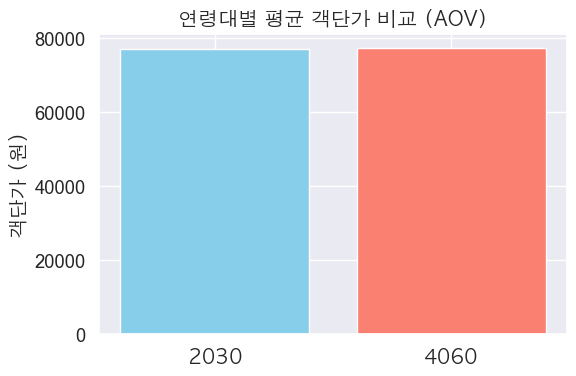

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['2030', '4060'], [young['total_price'].mean(), senior['total_price'].mean()], color=['skyblue', 'salmon'])

plt.title('Ïó∞Î†πÎåÄÎ≥Ñ ÌèâÍ∑† Í∞ùÎã®Í∞Ä ÎπÑÍµê (AOV)', fontproperties=font_prop)
plt.ylabel('Í∞ùÎã®Í∞Ä (Ïõê)', fontproperties=font_prop)
plt.xticks(fontproperties=font_prop)
plt.tight_layout()
plt.show()


Ìï¥ÏÑù 1: "4060 Í≥†Í∞ù = Ïà®ÏùÄ Í≥†Í∞Ä ÏÜåÎπÑÏûê"

Ï£ºÎ¨∏ ÌöüÏàòÎÇò Í≥†Í∞ù ÏàòÎäî Ï†ÅÏßÄÎßå

Ìïú Î≤à Ï£ºÎ¨∏Ìï† Îïå Ïû•Î∞îÍµ¨Îãà Í∏àÏï°Ïù¥ ÌÅ¨Îã§

**Í≥†Í∞ùÎãπ Í∞ÄÏπò(LTV)**Í∞Ä ÎÜíÏùÑ Í∞ÄÎä•ÏÑ± ÏûàÏùå

Ìï¥ÏÑù 2: "2030 Í≥†Í∞ù = ÎπàÎ≤àÌïú ÏÜåÎπÑÏûê"
Ï£ºÎ¨∏ ÏàòÎäî ÎßéÏßÄÎßå 1Ìöå Í≤∞Ï†ú Í∏àÏï°ÏùÄ 4060Í≥º ÎπÑÏä∑

Ï†äÏùÄ Ï∏µÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ Îã§ÏñëÏÑ± + Í≤ΩÌóò ÏÜåÎπÑ

ÎπàÎèÑ Ï§ëÏã¨, Ïù¥ÌÉà Î∞©ÏßÄ Ï†ÑÎûµ ÌïÑÏöî


Í≥†Í∞ù ÏàòÎäî Ï†ÅÏùÄÎç∞ Í∞ùÎã®Í∞ÄÍ∞Ä ÎπÑÏä∑ÌïòÎã§Îäî Í±¥,
4060 Í≥†Í∞ù Ïú†ÏûÖÎßå Ïûò ÏãúÏºúÎèÑ Í≥ßÎ∞îÎ°ú Îß§Ï∂úÏù¥ Ïò§Î•∏Îã§Îäî Îúª




## Í≥†Í∞ù ÏÑ∏Î∂ÑÌôî & Ï∂îÏ≤ú ÏãúÏä§ÌÖú Í∏∞Î∞ò Î∂ÑÏÑù

### RFM Í∏∞Î∞ò Í≥†Í∞ù ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

In [57]:
# Ï£ºÎ¨∏ Îã®ÏúÑ RFM Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
rfm_df = df.groupby('idUser').agg(
    Recency=('OrderDT', lambda x: (df['OrderDT'].max() - x.max()).days),
    Frequency=('idOrder', pd.Series.nunique),
    Monetary=('Price', 'sum'),
    Age=('Age', 'first'),
    Gender=('Gender', 'first')
).reset_index()


#### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î™®Îç∏ Ï†ÅÏö© (KMeans Îì±)

In [63]:
from sklearn.preprocessing import StandardScaler\
# from sklearn.cluster import KMeans

# RFMÎßå Ïä§ÏºÄÏùºÎßÅ
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
X_scaled = StandardScaler().fit_transform(X)

# k=4 ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú ÎÇòÎàî
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_map = {
    1: 'VIP Í≥†Í∞ù',
    0: 'Ï∂©ÏÑ± Í≥†Í∞ù',
    2: 'ÏùºÎ∞ò Í≥†Í∞ù',
    3: 'Ïù¥ÌÉà Í≥†Í∞ù'
}

rfm_df['Í≥†Í∞ùÏú†Ìòï'] = rfm_df['Cluster'].map(cluster_map)



In [64]:
# Í∞Å Í∑∏Î£π ÌèâÍ∑† ÎπÑÍµê
cluster_summary = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print(cluster_summary)


            Recency  Frequency      Monetary
Cluster                                     
0         18.125000  58.038462  4.355447e+06
1         12.080000  70.946667  5.560127e+06
2         14.395833  36.250000  2.920139e+06
3        509.000000  42.000000  3.026140e+06


## Í≥†Í∞ùÏú†Ìòï Ï†ïÎ≥¥Î•º **Í∏∞Ï°¥ Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ(df)**Ïóê Îß§Ìïë

In [65]:
# ÏÇ¨Ïö©Ïûê IDÏôÄ Í≥†Í∞ùÏú†ÌòïÎßå Ï∂îÏ∂ú
user_segments = rfm_df[['idUser', 'Í≥†Í∞ùÏú†Ìòï']]

# Í∏∞Ï°¥ dfÏóê Î≥ëÌï©
df = df.merge(user_segments, on='idUser', how='left')



In [66]:
df.head()

idUser            idOrder             OrderDT           ItemCode  Price  \
0  U10001  U10001-O2022-1002 2022-01-06 17:08:51  L4-M17-S0530-1024  33310   
1  U10001  U10001-O2022-1002 2022-01-06 17:08:51  L1-M21-S0540-1082   3780   
2  U10001  U10001-O2022-1002 2022-01-06 17:08:51  L1-M15-S0140-1311  22520   
3  U10001  U10001-O2022-1002 2022-01-06 17:08:51  L4-M12-S0350-1035  21630   
4  U10001  U10001-O2022-1003 2022-01-13 16:50:14  L4-M12-S0640-1057  11700   

           DeliveryDT Gender  Age  FamilyCount MemberYN  ...  ItemSmallName  \
0  07JAN2022:06:24:00     Ïó¨ÏÑ±   26            2        Y  ...             Ï†ÑÎ≥µ   
1  07JAN2022:06:24:00     Ïó¨ÏÑ±   26            2        Y  ...             Ï¶âÏÑù   
2  07JAN2022:06:24:00     Ïó¨ÏÑ±   26            2        Y  ...             ÎÉâÎèô   
3  07JAN2022:06:24:00     Ïó¨ÏÑ±   26            2        Y  ...             ÏÇ¨Í≥º   
4  14JAN2022:06:28:00     Ïó¨ÏÑ±   26            2        Y  ...            ÌÜ†ÎßàÌÜ†   

                         ItemName  PriceYear  PriceMin  PriceMax year_month  \
0             ÏôÑÎèÑ ÌôúÏ†ÑÎ≥µ 1kg Ï§ë 22-25ÎØ∏       2022     33160     37070    2022-01   
1             ÎèôÏõê ÏñëÎ∞ò Ï∞®ÎèåÎêúÏû•Ï∞åÍ∞ú (460G)       2022      3690      3970    2022-01   
2  Ïò§ÎöúÍ∏∞ Îì¨Îøç ÏÉàÏö∞Î≥∂ÏùåÎ∞•450g (2Ïù∏Î∂Ñ) x 5Î¥âÏßÄ /       2022     22150     23150    2022-01   
3    [ÏÇ∞ÏßÄÏßÅÏÜ°] ÏÉàÏΩ§Îã¨ÏΩ§ Î∂ÄÏÇ¨ ÏÇ¨Í≥º 5kg (13Í≥ºÎÇ¥)       2022     20810     23030    2022-01   
4          Ïä§ÌÖåÎπÑÏïÑ Î∞©Ïö∏ ÌÜ†ÎßàÌÜ† ÎùºÎ£® ÌÜ†ÎßùÍ≥† 1kg       2022     11640     13020    2022-01   

  year_week   weekday age_group    Í≥†Í∞ùÏú†Ìòï  
0   2022-01  Thursday       20ÎåÄ  VIP Í≥†Í∞ù  
1   2022-01  Thursday       20ÎåÄ  VIP Í≥†Í∞ù  
2   2022-01  Thursday       20ÎåÄ  VIP Í≥†Í∞ù  
3   2022-01  Thursday       20ÎåÄ  VIP Í≥†Í∞ù  
4   2022-02  Thursday       20ÎåÄ  VIP Í≥†Í∞ù  

[5 rows x 27 columns]

## Í≥†Í∞ùÏú†ÌòïÎ≥Ñ Ïû•Î∞îÍµ¨Îãà Î∂ÑÏÑù

In [70]:
pip install mlxtend

19826.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.1/11.1 MB 44.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Í≥†Í∞ùÏú†ÌòïÎ≥Ñ Ïû•Î∞îÍµ¨Îãà Î∂ÑÏÑù
vip_orders = df[df['Í≥†Í∞ùÏú†Ìòï'] == 'VIP Í≥†Í∞ù']

# Ï£ºÎ¨∏ Îã®ÏúÑÎ°ú ÏïÑÏù¥ÌÖú Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
basket_data = vip_orders.groupby('idOrder')['ItemSmallName'].unique().tolist()

# Î¶¨Ïä§Ìä∏Î•º One-hot Ïù∏ÏΩîÎî©
te = TransactionEncoder()
te_ary = te.fit(basket_data).transform(basket_data)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)

# ÎπàÎ∞ú Ìï≠Î™© ÏßëÌï© Ï∞æÍ∏∞
frequent_items = apriori(df_basket, min_support=0.05, use_colnames=True)

# Ïó∞Í¥ÄÍ∑úÏπô ÏÉùÏÑ±
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

# Í≤∞Í≥º ÏòàÏãú Î≥¥Í∏∞
rules.sort_values(by='confidence', ascending=False).head()


antecedents consequents  antecedent support  consequent support   support  \
0       (Í≥†Íµ¨Îßà)        (ÎÉâÎèô)            0.220071            0.326630  0.076114   
2        (ÏÇ¨Í≥º)        (ÎÉâÎèô)            0.268934            0.326630  0.090772   
3        (ÎÉâÎèô)        (ÏÇ¨Í≥º)            0.326630            0.268934  0.090772   
1        (ÎÉâÎèô)       (Í≥†Íµ¨Îßà)            0.326630            0.220071  0.076114   

   confidence      lift  representativity  leverage  conviction  \
0    0.345858  1.058867               1.0  0.004232    1.029394   
2    0.337526  1.033358               1.0  0.002930    1.016447   
3    0.277906  1.033358               1.0  0.002930    1.012424   
1    0.233026  1.058867               1.0  0.004232    1.016891   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.071282  0.161741   0.028555    0.289442  
2       0.044157  0.179821   0.016181    0.307716  
3       0.047940  0.179821   0.012271    0.307716  
1       0.082562  0.161741   0.016611    0.289442